In [2]:
from matplotlib import pyplot as plt
import numpy as np

def Q_graph(arr, x_title, y_title, title, label, max_perc=100):
    """
    This creates a quantile graph of the result
    :param arr: The array to be plotted
    :param x_title: the title of the x-axis
    :param y_title: the title of the y-axis
    :param title: the title of the graph
    :param label: the label of the plot
    :param max_perc: The percentage to up we plot.
    """
    sorted_arr = np.sort(arr)
    percentiles = np.arange(1, len(arr) + 1) / len(arr) * 100
    if max_perc != 100:
        limit = percentiles <= max_perc
        percentiles = percentiles[limit]
        sorted_arr = sorted_arr[limit]

    plt.plot(percentiles, sorted_arr, label=label)

    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.savefig(f'{title}.png')
    plt.show()

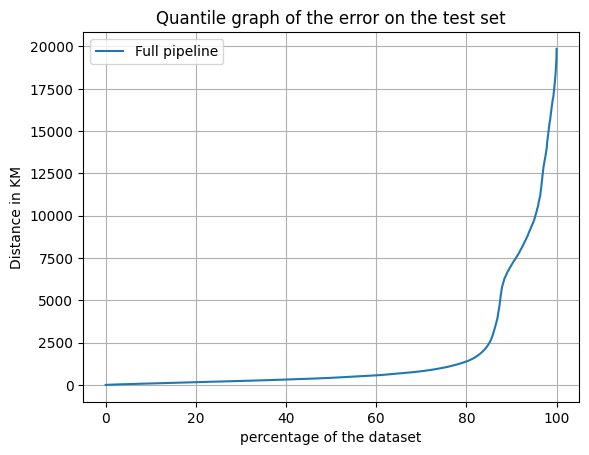

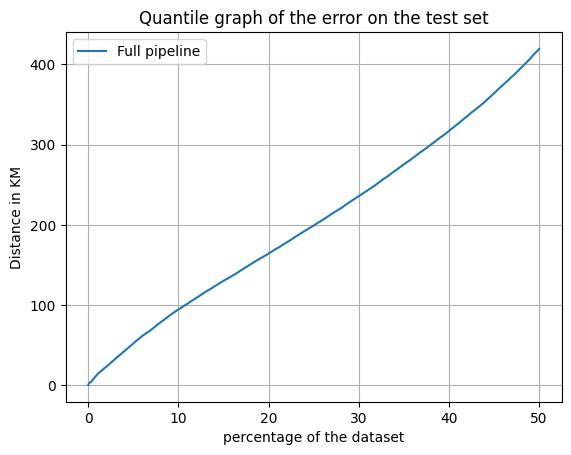

In [30]:
import pandas as pd

moco_df = pd.read_csv("n_errors.csv")
filter_df = pd.read_csv("cluster.csv")
test_df = pd.read_csv("test_errors.csv")

def print_percentage_below(df, threshold):
  print((df["0"] < threshold).mean() * 100)

Q_graph(test_df['0'].to_numpy(), 'percentage of the dataset', 'Distance in KM', 'Quantile graph of the error on the test set',
                      'Full pipeline')
Q_graph(test_df['0'].to_numpy(), 'percentage of the dataset', 'Distance in KM', 'Quantile graph of the error on the test set',
                      'Full pipeline', 50)

In [31]:
crits = [1,25, 200, 2500]
for crit in crits:
  print_percentage_below(moco_df, crit)

0.005935915852456876
1.092208516852065
25.143352367836837
87.20691415478494


In [32]:
for crit in crits:
  print_percentage_below(filter_df, crit)

0.0023743663409827504
0.4819963672194983
24.845369392043498
87.22234753600134


In [33]:
for crit in crits:
  print_percentage_below(test_df, crit)

0.023389509189615056
2.2244654266123374
25.140029298437828
85.11442394100919
